In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('StudentsPerformance.csv')

In [3]:
data.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [4]:
data.isna().any()

gender                         False
race/ethnicity                 False
parental level of education    False
lunch                          False
test preparation course        False
math score                     False
reading score                  False
writing score                  False
dtype: bool

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


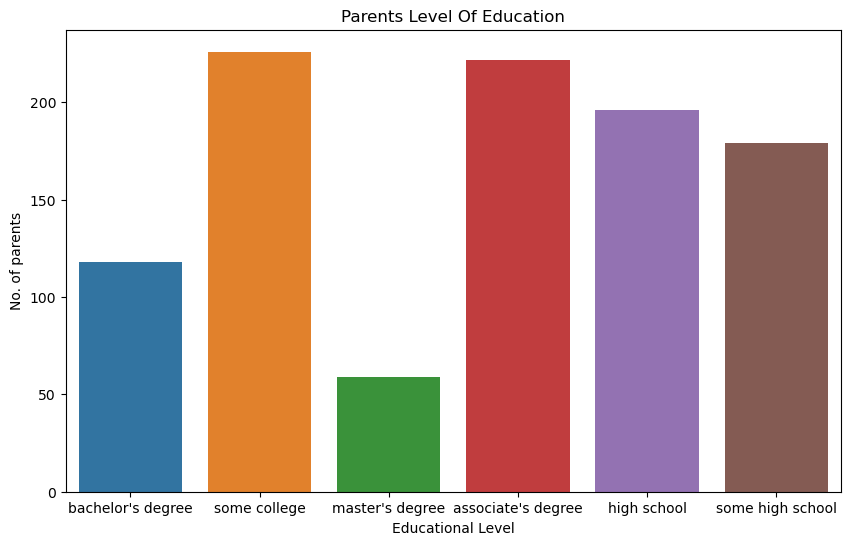

In [6]:
plt.figure(figsize = (10,6))
sns.countplot(x='parental level of education',data=data)
plt.xlabel('Educational Level')
plt.ylabel('No. of parents')
plt.title('Parents Level Of Education')
plt.show()

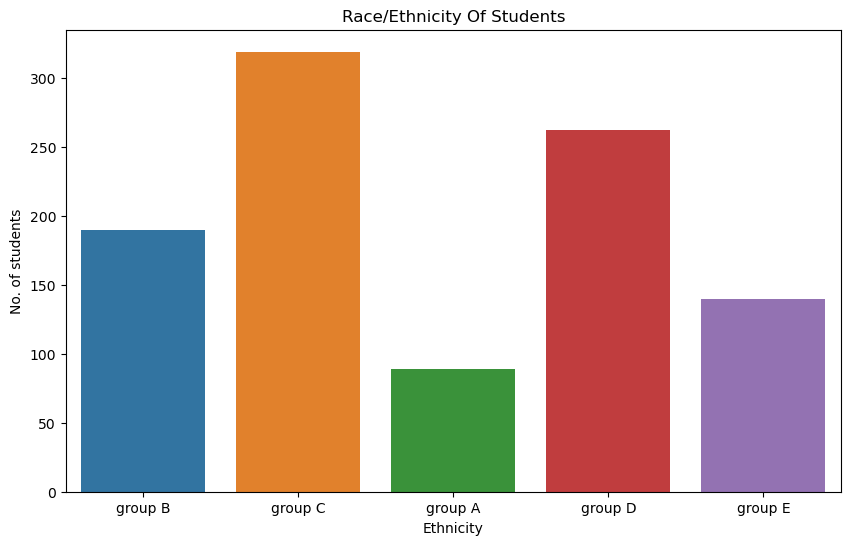

In [7]:
plt.figure(figsize = (10,6))
sns.countplot(x='race/ethnicity',data=data)
plt.xlabel('Ethnicity')
plt.ylabel('No. of students')
plt.title('Race/Ethnicity Of Students')
plt.show()

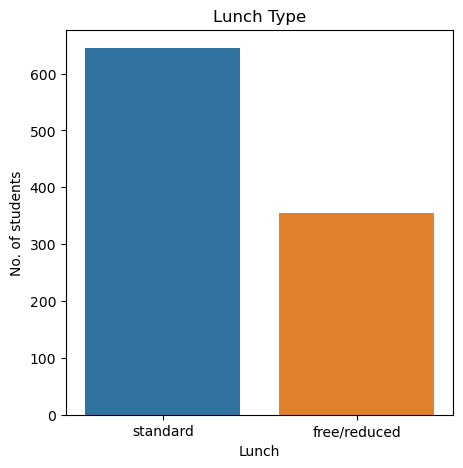

In [8]:
plt.figure(figsize = (5,5))
sns.countplot(x='lunch',data=data)
plt.xlabel('Lunch')
plt.ylabel('No. of students')
plt.title('Lunch Type')
plt.show()

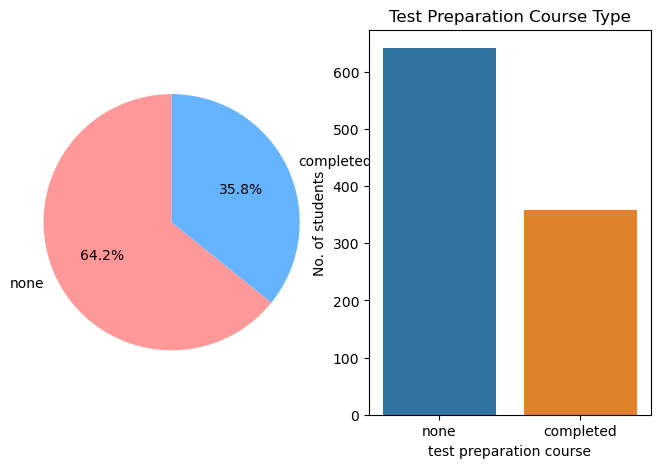

In [9]:
plt.figure(figsize = (8,5))
#plot 1
plt.subplot(1,2,1)
prep_counts = data['test preparation course'].value_counts()
# Create a pie chart
plt.pie(prep_counts, labels=prep_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal') 

#plot 2
plt.subplot(1,2,2)
sns.countplot(x='test preparation course',data=data)
plt.xlabel('test preparation course')
plt.ylabel('No. of students')

# Display the chart
plt.title('Test Preparation Course Type')
plt.show()

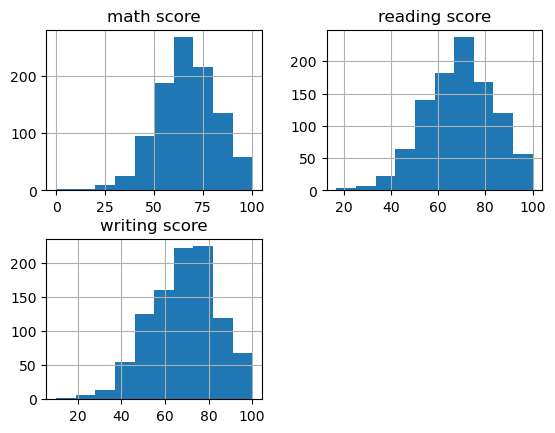

In [10]:
%matplotlib inline
scores = data[['math score','reading score','writing score']]
scores.hist()
plt.title('test preparation course Type')
plt.show()

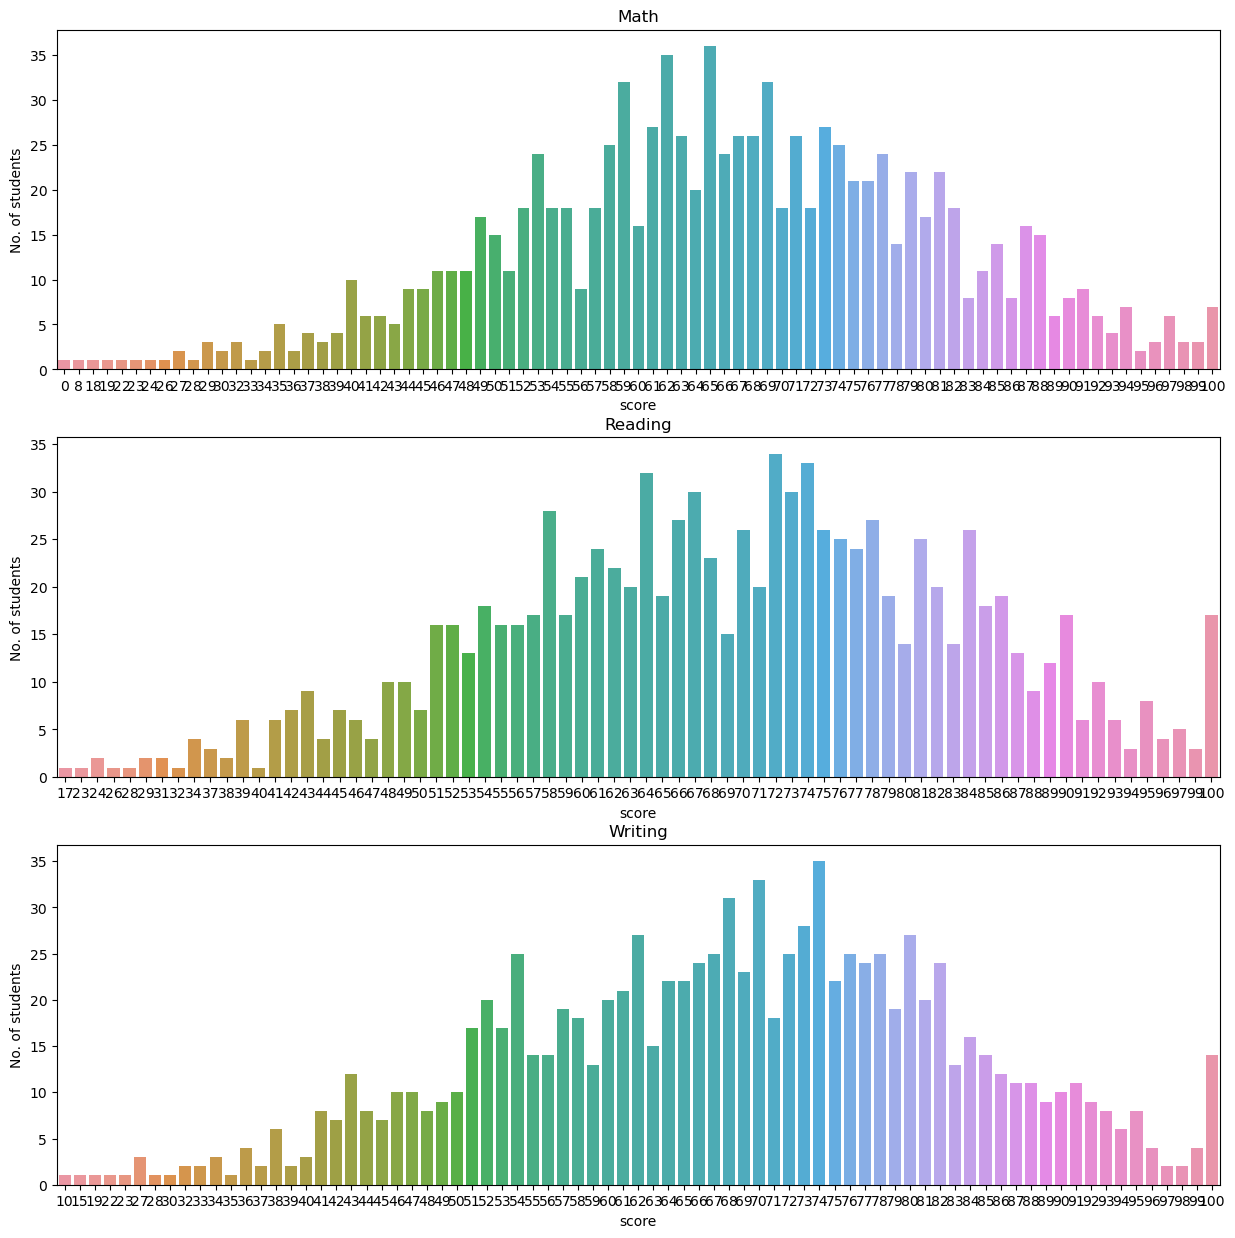

In [11]:
#subplot for student marks
plt.figure(figsize=(15, 15))

# Plot 1
plt.subplot(3, 1, 1)
sns.countplot(x='math score', data=data)
plt.xlabel('score')
plt.ylabel('No. of students')
plt.title("Math")

# Plot 2
plt.subplot(3, 1, 2)
sns.countplot(x='reading score', data=data)
plt.xlabel('score')
plt.ylabel('No. of students')
plt.title('Reading')

# Plot 3
plt.subplot(3, 1, 3)
sns.countplot(x='writing score', data=data)
plt.xlabel('score')
plt.ylabel('No. of students')
plt.title('Writing')

plt.show()

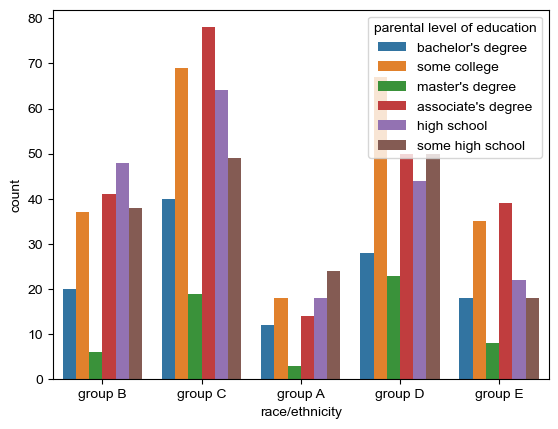

In [12]:
sns.countplot(x="race/ethnicity", hue="parental level of education",data=data)
sns.set(rc = {'figure.figsize':(20,8)})

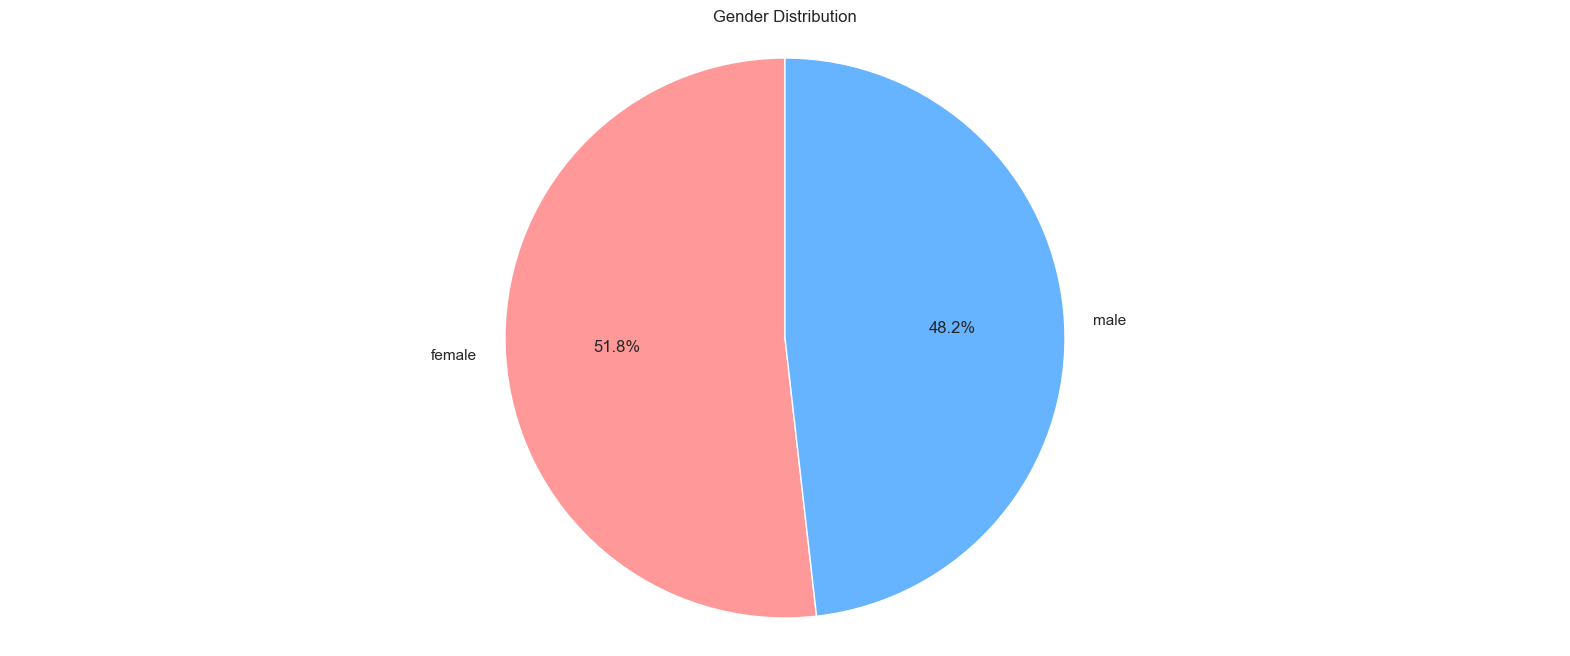

In [13]:
gender_counts = data['gender'].value_counts()

# Create a pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  

# Display the chart
plt.title('Gender Distribution')
plt.show()

In [16]:
data["mean score"] = ((data["math score"] + data["reading score"] + data["writing score"]) / 3).round()
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0
1,female,group C,some college,standard,completed,69,90,88,82.0
2,female,group B,master's degree,standard,none,90,95,93,93.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.0
4,male,group C,some college,standard,none,76,78,75,76.0


In [17]:
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()
data['gender'] = lc.fit_transform(data['gender'])
data['race/ethnicity'] = lc.fit_transform(data['race/ethnicity'])
data['parental level of education'] = lc.fit_transform(data['parental level of education'])
data['lunch'] = lc.fit_transform(data['lunch'])
data['test preparation course'] = lc.fit_transform(data['test preparation course'])
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score
0,0,1,1,1,1,72,72,74,73.0
1,0,2,4,1,0,69,90,88,82.0
2,0,1,3,1,1,90,95,93,93.0
3,1,0,0,0,1,47,57,44,49.0
4,1,2,4,1,1,76,78,75,76.0


<Figure size 1200x600 with 0 Axes>

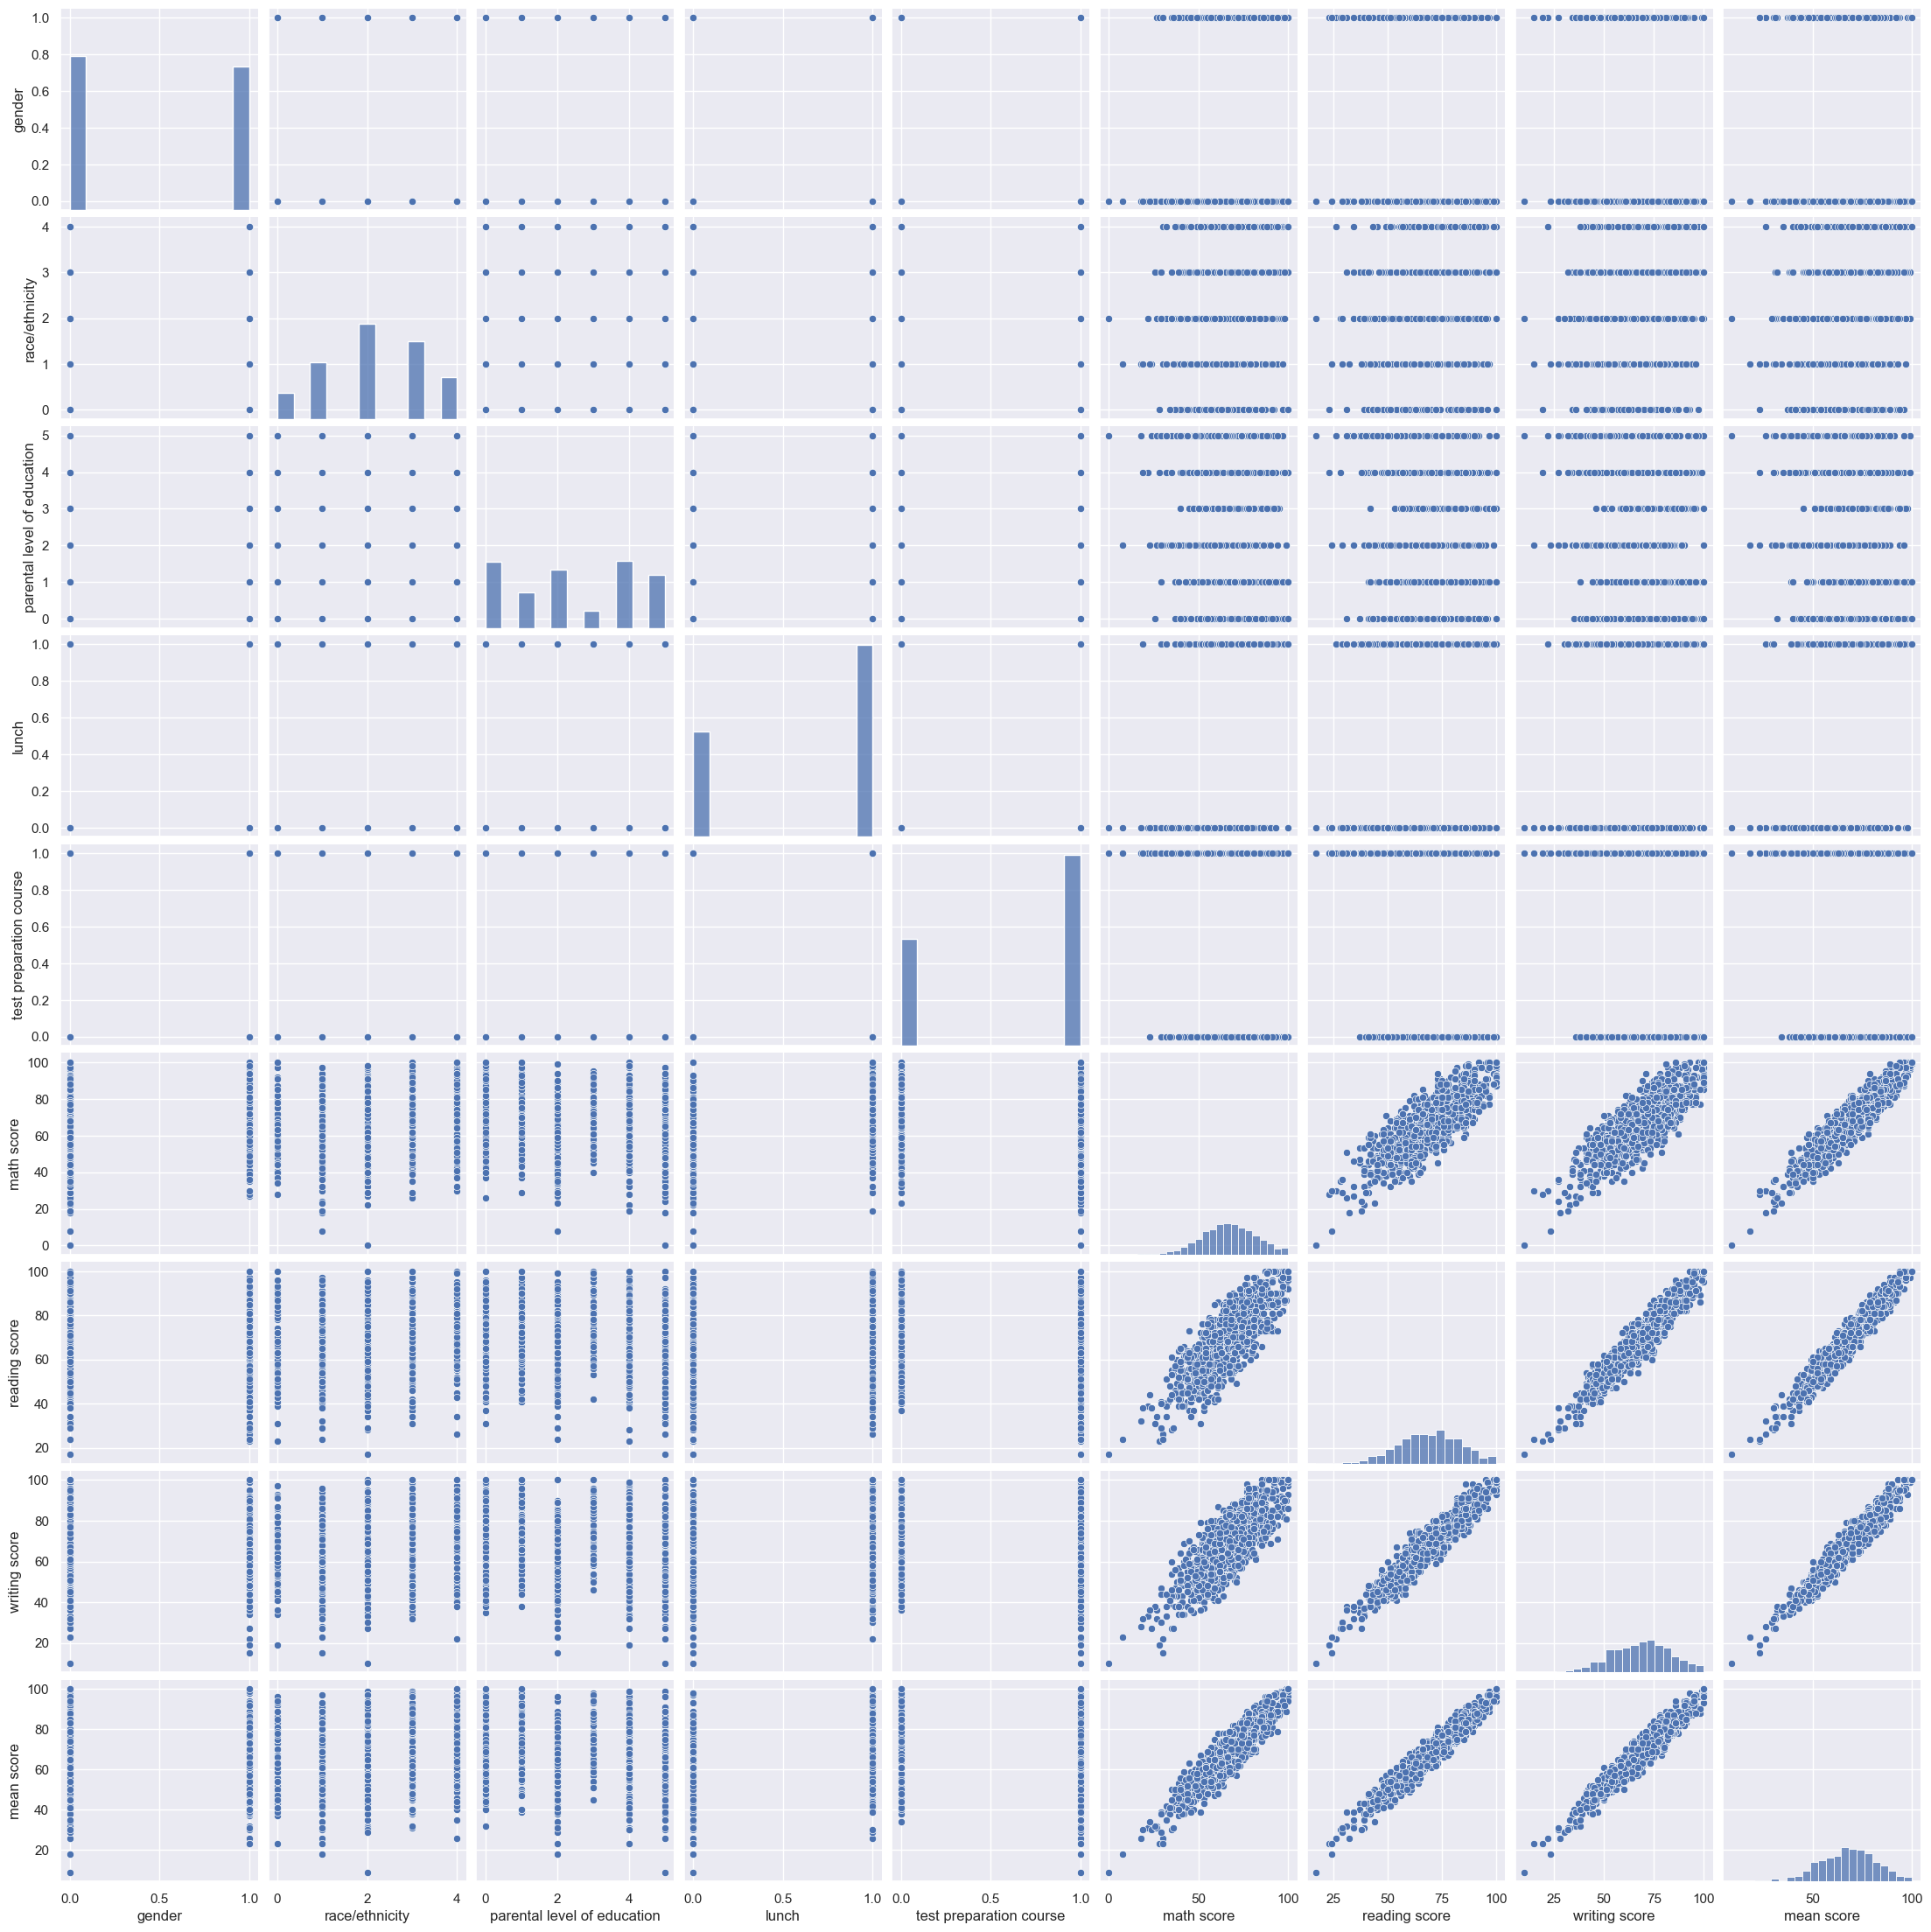

In [18]:
plt.figure(figsize = (12,6))
sns.pairplot(data)
plt.show()

### Finding a performance model

In [20]:
#Data might be widely distributed so let's scale it between 0 and 1
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(data).transform(data)

array([[0.        , 0.25      , 0.2       , ..., 0.6626506 , 0.71111111,
        0.7032967 ],
       [0.        , 0.5       , 0.8       , ..., 0.87951807, 0.86666667,
        0.8021978 ],
       [0.        , 0.25      , 0.6       , ..., 0.93975904, 0.92222222,
        0.92307692],
       ...,
       [0.        , 0.5       , 0.4       , ..., 0.65060241, 0.61111111,
        0.61538462],
       [0.        , 0.75      , 0.8       , ..., 0.73493976, 0.74444444,
        0.71428571],
       [0.        , 0.75      , 0.8       , ..., 0.8313253 , 0.84444444,
        0.81318681]])

### 1. Logistic Regression 

In [21]:
from sklearn.model_selection import train_test_split
x=data.drop(columns='test preparation course').values
y=data['test preparation course'].values
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=1)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [23]:
# Initialize Logistic Regression classifier
log_reg = LogisticRegression(max_iter=2000, solver='liblinear')

# Train the mode
log_reg.fit(x_train, y_train)

# Predict on the validation set
y_pred_log_reg = log_reg.predict(x_test)

In [24]:
# Evaluate performance on validation set
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("Validation Accuracy:", accuracy_log_reg)


Validation Accuracy: 0.755


In [25]:
#Train
from sklearn.neighbors import KNeighborsClassifier
# Initialize KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Train the model
knn.fit(x_train, y_train)

# Predict
y_pred_knn = knn.predict(x_test)

In [29]:
# Evaluate performance 
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy_knn)

Accuracy: 0.65


In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
# Initialize Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model 
decision_tree.fit(x_train, y_train)
# Predict
y_pred_tree = decision_tree.predict(x_test)

In [33]:
# Evaluate performance 
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print("Accuracy:", accuracy_tree)

Accuracy: 0.63


In [36]:
from sklearn.ensemble import RandomForestClassifier
# Initialize Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42) # You can set other hyperparameters as needed
# Train the model 
random_forest.fit(x_train, y_train)
#Predict
y_pred_forest = random_forest.predict(x_test)

In [37]:
# Evaluate performance 
accuracy_forest = accuracy_score(y_test, y_pred_forest)
print("Accuracy:", accuracy_forest)

Accuracy: 0.68


In [40]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', C=1.0)  # Example with a linear kernel and regularization parameter C=1.0
svm_model.fit(x_train, y_train)

# Predict
y_pred_svm = svm_model.predict(x_test)

In [41]:
# Evaluate performance 
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy_svm)

Accuracy: 0.745


In [42]:
from sklearn.naive_bayes import GaussianNB

In [43]:
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(x_train, y_train)

# Predict 
y_pred_nb = naive_bayes_model.predict(x_test)

In [44]:
# Evaluate performance 
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Accuracy:", accuracy_nb)

Accuracy: 0.66


In [47]:
models = [knn, log_reg, decision_tree, random_forest,svm_model ,naive_bayes_model ]
model_names = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest','SVM','Naive Bayes']
for model, name in zip(models, model_names):
 # Train the model on the training set
 model.fit(x_train, y_train)
 
 # Validate the model on the validation set
 y_pred_test = model.predict(x_test)
 
 # Evaluate model performance on validation set
 accuracy_test = accuracy_score(y_test, y_pred_test)
 # Print or store the validation results for comparison
 print(f"{name} Accuracy Score: {accuracy_test}")

Logistic Regression Accuracy Score: 0.65
KNN Accuracy Score: 0.755
Decision Tree Accuracy Score: 0.63
Random Forest Accuracy Score: 0.68
SVM Accuracy Score: 0.745
Naive Bayes Accuracy Score: 0.66


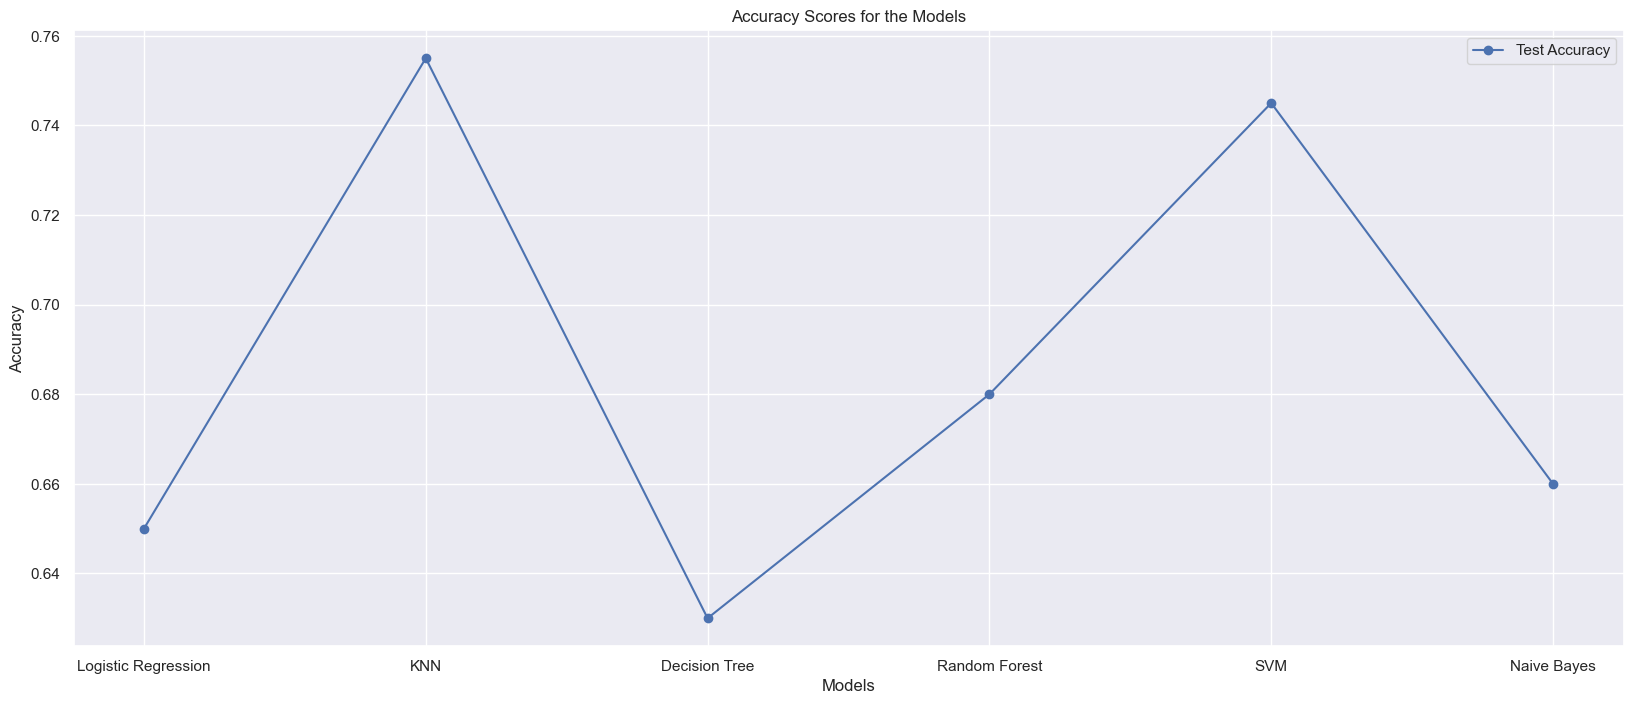

In [49]:
#plot line graph
models = ['Logistic Regression','KNN', 'Decision Tree', 'Random Forest','SVM','Naive Bayes']
test_scores = [0.65, 0.755, 0.63, 0.68, 0.745, 0.66]

plt.plot(models, test_scores, marker='o', label='Test Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores for the Models')
plt.legend()
plt.grid(True)
plt.show()